In [7]:
from h5py import File

p = "/mnt/embl/scratch/hellgoth/data/chlamy_initial_dataset/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_chunksize-1-1276-1276.hdf5"
data = File(p, "r")["0"][0, 0]
data.shape

(199, 1276, 1276)

In [3]:
data.min(), data.max(), data.mean(), data.std(), data.dtype

(0, 2343, 146.5848930515778, 208.4678875992664, dtype('uint16'))

In [4]:
data = data / data.max()

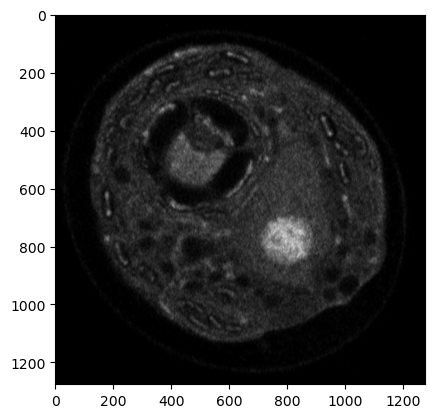

In [5]:
import matplotlib.pyplot as plt

plt.imshow(data[96], cmap="gray", vmin=0, vmax=1)
plt.show()

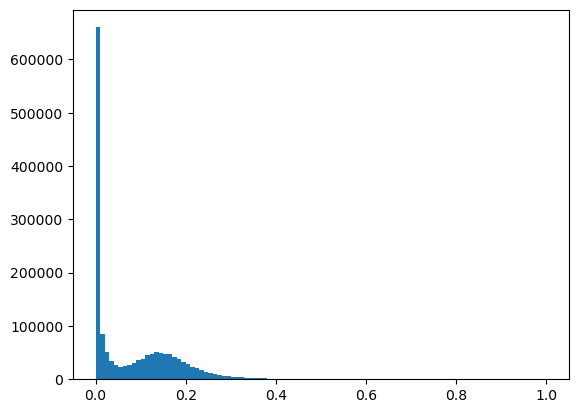

In [6]:
plt.hist(data[96].flatten(), bins=100, range=(0, 1))
plt.show()

In [10]:
d = (data - data.mean()) / data.std()
d.min(), d.max(), d.mean(), d.std(), d.dtype

(-0.7031533476913959,
 10.535987735293537,
 -1.1811666019901794e-16,
 1.0000000000000018,
 dtype('float64'))

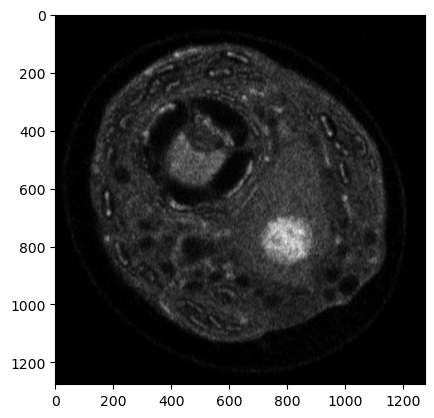

In [11]:
plt.imshow(d[96], cmap="gray")
plt.show()

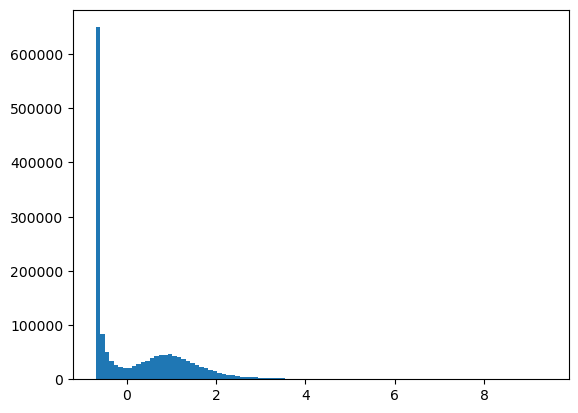

In [13]:
plt.hist(d[96].flatten(), bins=100)
plt.show()

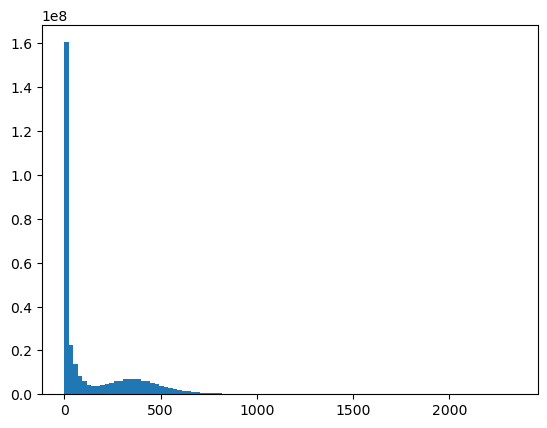

In [14]:
plt.hist(data.flatten(), bins=100)
plt.show()

In [17]:
import os
import torch

out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor"
os.makedirs(os.path.dirname(out), exist_ok=True)
print(data.max())
t = data/data.max()
t = torch.tensor(t, dtype=torch.float32).unsqueeze(0)
torch.save({"240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00": t}, out)

2343


In [18]:
import os
import torch

inp = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor"
out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_single_tensor"
os.makedirs(os.path.dirname(out), exist_ok=True)
data = torch.load(inp)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]
t = data[:, 96:97]
print(t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype)
torch.save({"240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00": t}, out)

/tmp/ipykernel_884810/951192304.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(inp)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]


torch.Size([1, 1, 1276, 1276]) tensor(0.8988) tensor(0.) tensor(0.0839) tensor(0.1035) torch.float32


In [20]:
import os
import torch

out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor_single"
os.makedirs(os.path.dirname(out), exist_ok=True)
data = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]
t = data[:, :, 200:-200, 200:-200]
print(t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype)
torch.save({"240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00": t}, out)

out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor"
os.makedirs(os.path.dirname(out), exist_ok=True)
data = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]
t = data[:, 20:-20, 200:-200, 200:-200]
print(t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype)
torch.save({"240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00": t}, out)

/tmp/ipykernel_884810/746573940.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]


torch.Size([1, 1, 876, 876]) tensor(0.8988) tensor(0.) tensor(0.1512) tensor(0.1040) torch.float32


/tmp/ipykernel_884810/746573940.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]


torch.Size([1, 159, 876, 876]) tensor(1.) tensor(0.) tensor(0.1398) tensor(0.0934) torch.float32


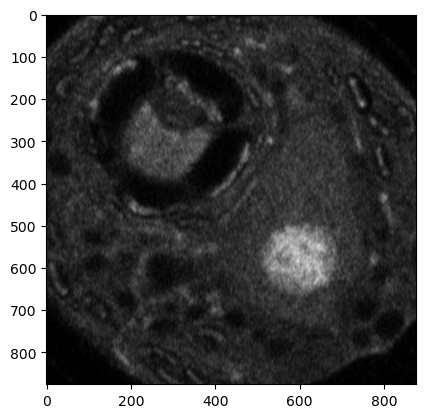

In [22]:
plt.imshow(t[0, 76], cmap="gray", vmin=0, vmax=1)
plt.show()

(199, 1276, 1276) 0 2343 146.5848930515778 208.4678875992664 uint16
(199, 1276, 1276) 0.0 1.0 0.06256290783251284 0.0889747706356241 float64


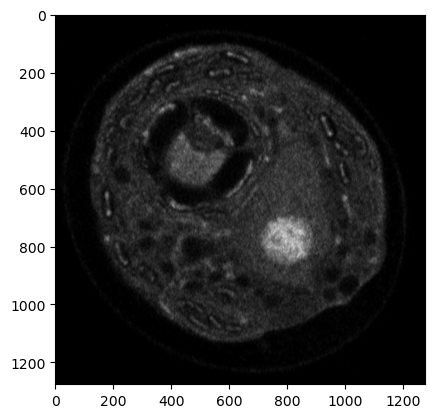

In [11]:
from h5py import File
import matplotlib.pyplot as plt

p = "/mnt/embl/scratch/hellgoth/data/chlamy_initial_dataset/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_chunksize-1-1276-1276.hdf5"
data = File(p, "r")["0"][0, 0]
print(data.shape, data.min(), data.max(), data.mean(), data.std(), data.dtype)
data = data / data.max()
print(data.shape, data.min(), data.max(), data.mean(), data.std(), data.dtype)
plt.imshow(data[96], cmap="gray", vmin=0, vmax=1)
plt.show()

In [12]:
data = data[None]
data.shape

(1, 199, 1276, 1276)

In [10]:
import os
import torch

out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor_800"
t = torch.tensor(data[:, 20:-20, 238:-238, 238:-238], dtype=torch.float32)
print(t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype)
os.makedirs(os.path.dirname(out), exist_ok=True)
torch.save({"240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00": t}, out)

torch.Size([1, 159, 800, 800]) tensor(1.) tensor(0.) tensor(0.1526) tensor(0.0896) torch.float32


In [11]:
out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor_800_single"
print(t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype)
os.makedirs(os.path.dirname(out), exist_ok=True)
torch.save({"240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00": t[:, 76]}, out)

torch.Size([1, 159, 800, 800]) tensor(1.) tensor(0.) tensor(0.1526) tensor(0.0896) torch.float32


In [13]:
import os
import torch
from skimage.transform import resize

out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor_224down"
slices = []
for i in range(data.shape[1]):
    slices.append(resize(data[0, i, 238:-238, 238:-238], (224, 224)))
t = torch.tensor(slices, dtype=torch.float32)[None]
print(t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype)
os.makedirs(os.path.dirname(out), exist_ok=True)
torch.save({"240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00": t}, out)

/tmp/ipykernel_29097/2837184018.py:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647176142/work/torch/csrc/utils/tensor_new.cpp:278.)
  t = torch.tensor(slices, dtype=torch.float32)[None]


torch.Size([1, 199, 224, 224]) tensor(0.9389) tensor(0.) tensor(0.1313) tensor(0.0927) torch.float32


In [14]:
out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor_224down_single"
print(t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype)
os.makedirs(os.path.dirname(out), exist_ok=True)
torch.save({"240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00": t[:, 76:77]}, out)

torch.Size([1, 199, 224, 224]) tensor(0.9389) tensor(0.) tensor(0.1313) tensor(0.0927) torch.float32


In [3]:
import os
import torch

In [4]:
out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor_800"
t = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]
t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype

/tmp/ipykernel_29097/130928968.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]


(torch.Size([1, 159, 800, 800]),
 tensor(1.),
 tensor(0.),
 tensor(0.1526),
 tensor(0.0896),
 torch.float32)

In [5]:
out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor_800_single"
t = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]
t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype

/tmp/ipykernel_29097/2834871145.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]


(torch.Size([1, 800, 800]),
 tensor(0.8988),
 tensor(0.),
 tensor(0.1620),
 tensor(0.1057),
 torch.float32)

In [6]:
torch.save({"240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00": t[None]}, out)

In [15]:
out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor_224down"
t = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]
t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype

/tmp/ipykernel_29097/1437090612.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]


(torch.Size([1, 199, 224, 224]),
 tensor(0.9389),
 tensor(0.),
 tensor(0.1313),
 tensor(0.0927),
 torch.float32)

In [16]:
out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor_224down_single"
t = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]
t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype

/tmp/ipykernel_29097/132807023.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t = torch.load(out)["240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00"]


(torch.Size([1, 1, 224, 224]),
 tensor(0.7460),
 tensor(9.0097e-08),
 tensor(0.1840),
 tensor(0.0988),
 torch.float32)

In [6]:
# different volume
from h5py import File

p = "/mnt/embl/scratch/hellgoth/data/chlamy_initial_dataset/240223_cw15-wtnew-wtold_anaphase_nhs-tub-cetn-dna_cf_00_chunksize-1-1276-1276.hdf5"
data = File(p, "r")["0"][0, 0]
print(data.shape, data.min(), data.max(), data.mean(), data.std(), data.dtype)
data = data.astype("float32")
data = data / 6564.0
print(data.shape, data.min(), data.max(), data.mean(), data.std(), data.dtype)

(277, 1276, 1276) 0 10436 444.76800870160235 766.0342285638015 uint16
(277, 1276, 1276) 0.0 1.5898842 0.067760296 0.116699524 float32


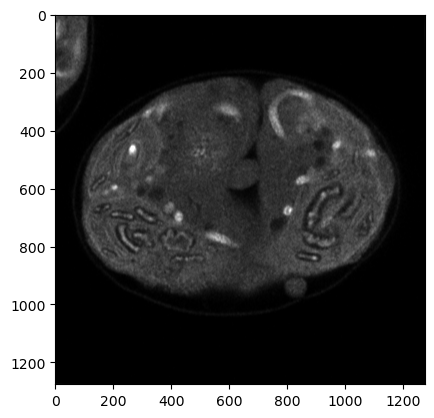

In [ ]:
plt.imshow(data[data.shape[0]//2], cmap="gray", vmin=0, vmax=1)
plt.show()

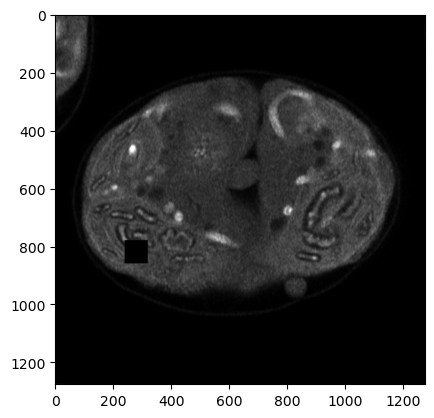

In [14]:
import numpy as np

size = 80
start = (data.shape[-1] - size) // 2
img = data[data.shape[0]//2]
mask = np.ones_like(img)
mask[780:780+size, 240:240+size] = 0
plt.imshow(img * mask, cmap="gray", vmin=0, vmax=1)
plt.show()

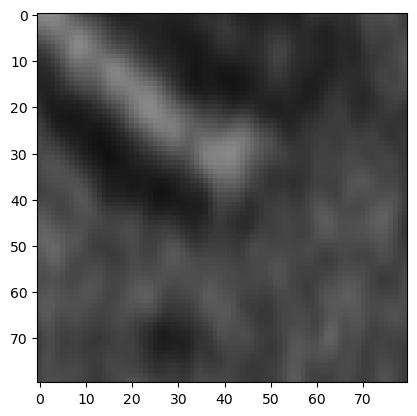

In [15]:
plt.imshow(data[data.shape[0]//2, 780:780+size, 240:240+size], cmap="gray", vmin=0, vmax=1)
plt.show()

In [18]:
d = data[data.shape[0]//2, 780:780+size, 240:240+size]
d.shape, d.max(), d.min(), d.mean(), d.std(), d.dtype

((80, 80), 0.540067, 0.07084095, 0.25610116, 0.08619841, dtype('float32'))

In [16]:
import torch

size = 80
t = torch.tensor(data[data.shape[0]//2, 780:780+size, 240:240+size], dtype=torch.float32).unsqueeze(0)
print(t.shape, t.max(), t.min(), t.mean(), t.std(), t.dtype)
out = "/mnt/embl/scratch/hellgoth/data/chlamy_MAESTER/240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00_tensor_single_crop80"
torch.save({"240229_cw15-wtnew-wtold_interphase_nhs-tub-cetn-dna_cf_00": t[None]}, out)

torch.Size([1, 80, 80]) tensor(0.5401) tensor(0.0708) tensor(0.2561) tensor(0.0862) torch.float32


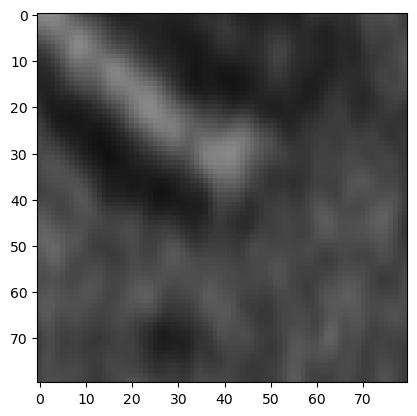

In [17]:
import matplotlib.pyplot as plt

plt.imshow(t[0], cmap="gray", vmin=0, vmax=1)
plt.show()

In [ ]:
plt.imshow(data[])